# EDA 
- univariate analysis- when we are trying to underatand individual variables/features /column through their distribution and summary statistics it forms part of univariate analysis.This includes calculating measures such as mean,median,mode,standard deviation,variance and data visualizations like histogram,bar charts,box plot.
- bivariate analysis - explores the relationship between two variables/features/columns.It identifies/uncovers patterns through techniques like scatter plots,pair plots,heat map ,correlation,covariance,violin Plots.
- multivariate analysis-  It involves examining more than two variables simultaneously to understand their relationships and combined effects.Example includes contour plots, PCA(principal component analysis) adding a hue to a scatter plot converts bivariate analysis to multivariate analysis.

### Steps in Data Analysis

#### 1.Importing necessary library
#### 2.reading the dataset
#### 3.data understanding (null values,checking duplicates,data types,etc)
#### 4. data reduction
#### 5. feature engineering  (done on columns)
#### 6. Creaating Features
#### 7. Data Wrangling/Data Cleaning (done on rows)

In [1]:
# step 1:
import numpy as np # Numpy for numerical operations and handling arrays
import pandas as pd # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt# Matplotlib for creating static, animated, and interactive visualizations
import seaborn as sns # Seaborn for making statistical plots more attractive and informative
# Suppressing any warnings that might come up during code execution to keep the o/p clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# step 2:
# Load the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv('used_cars_data.csv')
 
# Display the first 5 rows of the DataFrame.
data.head()



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
# step 3: 
data.info() #data.head()

# Display a concise summary of the DataFrame including the data types of each column and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
#check for duplicates
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [5]:
# check for nulls and treating them
(data.isnull().sum()/len(data))*100 # getting values in percentage.

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

## Data Reduction

In [6]:
# dropping the unnecessary columns from the model.
data.drop(columns = ['S.No.','New_Price'],inplace = True)

# dropping the null rows from the columns that are part of the model.
data.dropna(subset=['Mileage','Engine','Power','Seats','Price'],inplace = True)


In [7]:

# reset index after dropping rows
data.reset_index(drop = True , inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


### Feature Engineering

In [8]:
# Extract the brand from the 'Name' column and create a new column 'Brand'
data['Brand'] = data.Name.str.split().str.get(0)

In [9]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [10]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
5970,Maruti Swift VDI,Maruti,SwiftVDI
5971,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent1.1
5972,Mahindra Xylo D4 BSIV,Mahindra,XyloD4
5973,Maruti Wagon R VXI,Maruti,WagonR


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 653.6+ KB


In [12]:
from datetime import date
date.today().year
data['Car_Age'] = date.today().year - data['Year'] # calculate age of each car
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4New,12


In [13]:

# Extract the engine size from the 'Engine' column and convert it to float
data['Engine'] = data.Engine.str.split().str.get(0)
data['Engine'].astype(float)

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
5970    1248.0
5971    1120.0
5972    2498.0
5973     998.0
5974     936.0
Name: Engine, Length: 5975, dtype: float64

In [14]:
# change the datatype
data['Power'] = data.Power.str.split().str.get(0)
# Convert the 'Power' column to numeric values, coercing any errors to NaN
data['Power'] = pd.to_numeric(data['Power'] ,errors ='coerce') #coerce
data['Power'].astype(float)

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
5970     74.00
5971     71.00
5972    112.00
5973     67.10
5974     57.60
Name: Power, Length: 5975, dtype: float64

In [15]:
data['Seats']=data['Seats'].astype(str)

In [16]:
data['Engine']= data['Engine'].astype(float)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   object 
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 700.3+ KB


In [18]:
import numpy as np

In [19]:
# Function to convert km/kg to kmpl
def convert_to_kmpl(mileage):
    if 'km/kg' in mileage:
        value = float(mileage.replace(" km/kg","")) # extract numerical value.
        return value * 1.4 # replace with kmpl value.
    elif 'kmpl' in mileage:
        value = float(mileage.replace(" kmpl",""))
        return value  # keep kmpl value as it is
    else : 
        return np.nan # handle any unexpected values

In [20]:
# Example usage of the function
print(convert_to_kmpl("24.5 km/kg"))
print(convert_to_kmpl("24.5 kmpl"))
print(convert_to_kmpl("24.5 "))

34.3
24.5
nan


In [21]:
## Display a concise summary of the DataFrame including the data types of each column and the number of non-null values
data.info()
data['Mileage'] = data['Mileage'].apply(lambda x : convert_to_kmpl(str(x)))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   object 
 11  Price              5975 non-null   float64
 12  Brand              5975 non-null   object 
 13  Model              5975 non-null   object 
 14  Car_Age            5975 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 700.3+ KB
<class 'panda

In [22]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4New,12


### Data Wrangling / Data Cleaning

In [23]:
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [24]:
#Replace specific brand names in the 'Brand' column for consistency
data['Brand'].replace({'ISUZU' :'Isuzu','Land':'Land Rover','Mini':'Mini Cooper'},inplace = True)
# Print the unique brand names to confirm the replacements
print(data.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini']


In [25]:
print(data.Location.unique())
print(data.Fuel_Type.unique())
print(data.Transmission.unique())
print(data.Owner_Type.unique())
print(data.Seats.unique())
print(data.Model.unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['5.0' '7.0' '8.0' '4.0' '6.0' '2.0' '10.0' '9.0' '0.0']
['WagonR' 'Creta1.6' 'JazzV' 'ErtigaVDI' 'A4New' 'EONLPG' 'MicraDiesel'
 'InnovaCrysta' 'VentoDiesel' 'IndicaVista' 'CiazZeta' 'City1.5'
 'SwiftVDI' 'RoverRange' 'RoverFreelander' 'PajeroSport' 'AmazeS'
 'SwiftDDiS' 'Duster85PS' 'NewC-Class' '3Series' 'SCross' 'A62011-2015'
 'i201.2' 'VentoPetrol' 'CityCorporate' 'AltoK10' 'WRVi-VTEC' 'Innova2.5'
 'Duster110PS' 'CorollaAltis' 'SsangyongRexton' 'A62.7' 'Vento1.6'
 'VitaraBrezza' 'KUV100' 'M-ClassML' 'PoloDiesel' 'AltoLXi' 'NanoLX'
 'i20Magna' 'Elantra2.0' 'ElantraCRDi' 'Xcent1.1' 'TharCRDe' 'A42.0'
 'SwiftLDI' 'SwiftLdi' 'Grandi10' 'Vento2013-2015' 'KWIDRXT' 'i10Asta'
 'X-TrailSLX' 'ZenEstilo' 'FigoDiesel' 'IndicaV2' 'CityZX'
 'C-ClassProgressive' 'ErtigaSHVS' 'Creta1.4' '

## EDA

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5975.0,2013.386778,3.247238,1998.00,2012.00,2014.00,2016.00,2019.000
Kilometers_Driven,5975.0,58674.314979,91558.514361,171.00,33908.00,53000.00,73000.00,6500000.000
Mileage,5975.0,18.287676,4.823919,0.00,15.26,18.20,21.10,46.956
Engine,5975.0,1621.606695,601.036987,624.00,1198.00,1493.00,1984.00,5998.000
Power,5872.0,113.276894,53.881892,34.20,75.00,97.70,138.10,560.000
Price,5975.0,9.501647,11.205736,0.44,3.50,5.65,9.95,160.000
Car_Age,5975.0,11.613222,3.247238,6.00,9.00,11.00,13.00,27.000


**Analysis:**
- Year ranges from 1998 to 2019.This implies high range of 21 years with most of the cars falling between 2012 to 2019(75%).This implies that the data contains both old and latest model(mostly cars with less than 5 years of age.)
- Average kilometers driven is ~59 KM . The range is huge( around 64lakh) implying presence of outliers in the columns. It means we need to remove the outliers from this column.
- The minimum value in Mileage column is 0, which can not be sold.This appears like a data entry issue.
- Both Engine and Power have outliers and data seem to be rightly skewed.
- The max price for the used car is 160K,which is quite high for the used car.This may be an outlier or a data entry issue.
- Average age of car ~12 years.

In [27]:
# Select columns with categorical data types and store them in the list 'cat_col'
cat_col = data.select_dtypes(include =["object"]).columns.tolist()
# Select columns with numerical data types and store them in the list 'num_col'
num_col = data.select_dtypes(include = np.number).columns.tolist()
print("Categorical columns are:")
print(cat_col)
print("Numerical columns are:")
print(num_col)

Categorical columns are:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand', 'Model']
Numerical columns are:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Car_Age']


## EDA Univariate Analysis(Data Viz)

Year
Skewness: -0.84


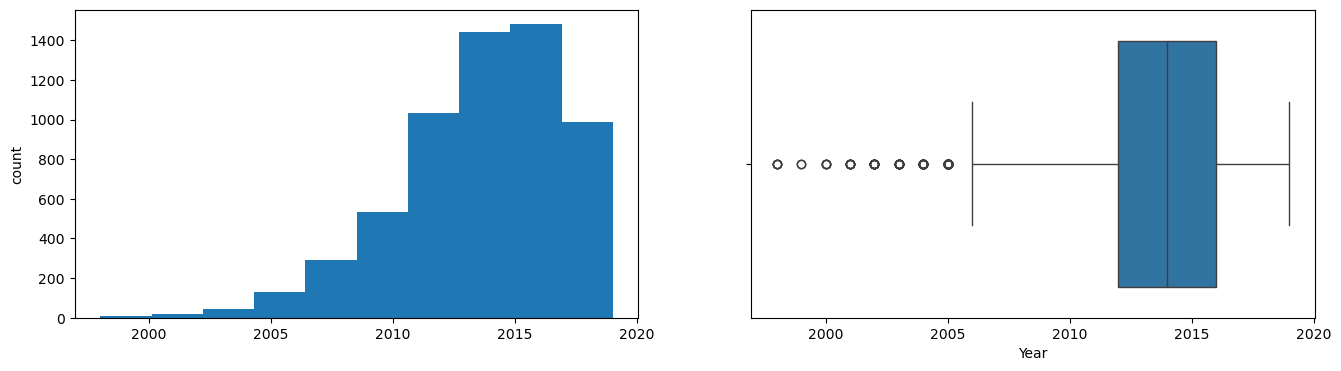

Kilometers_Driven
Skewness: 58.6


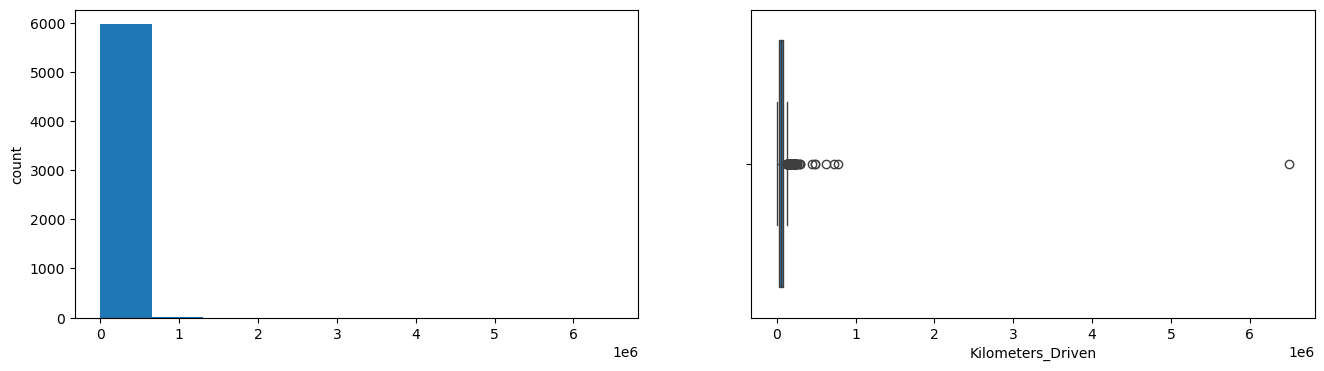

Mileage
Skewness: 0.3


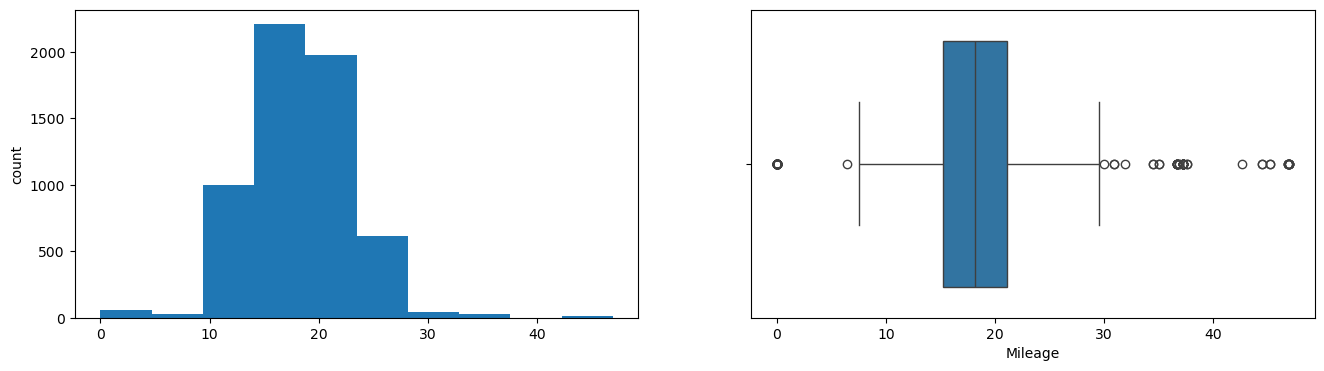

Engine
Skewness: 1.43


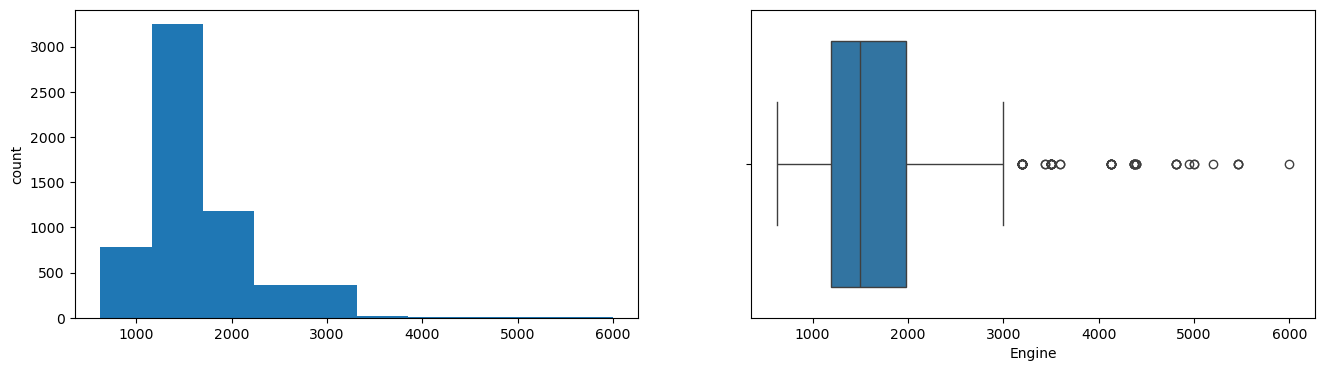

Power
Skewness: 1.92


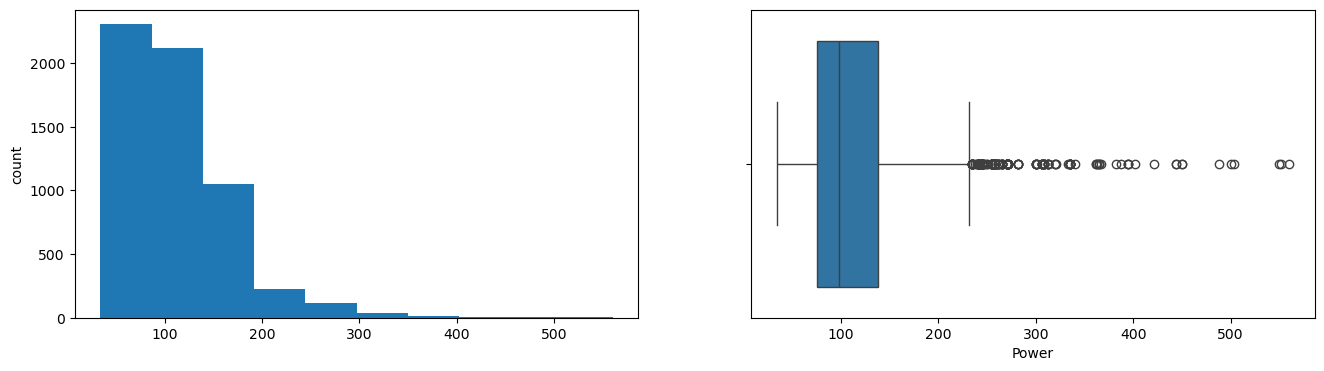

Price
Skewness: 3.33


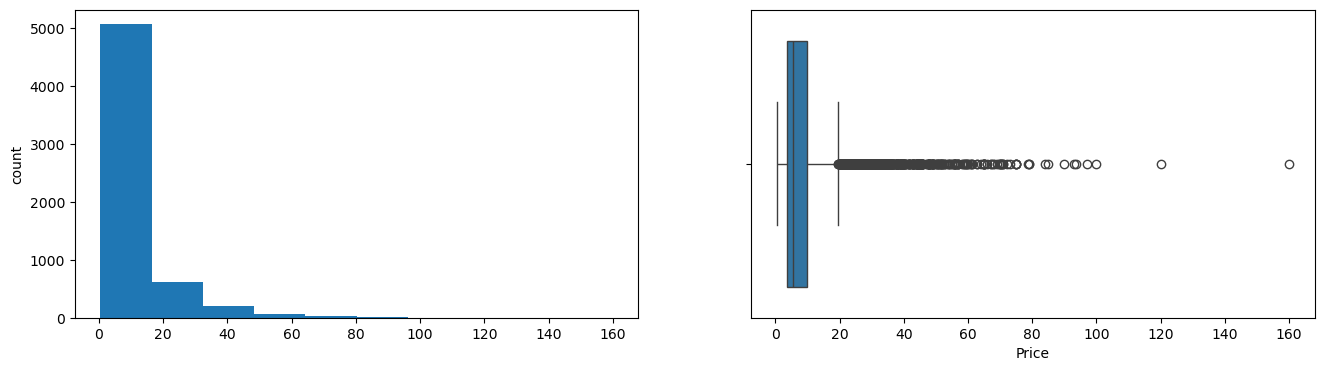

Car_Age
Skewness: 0.84


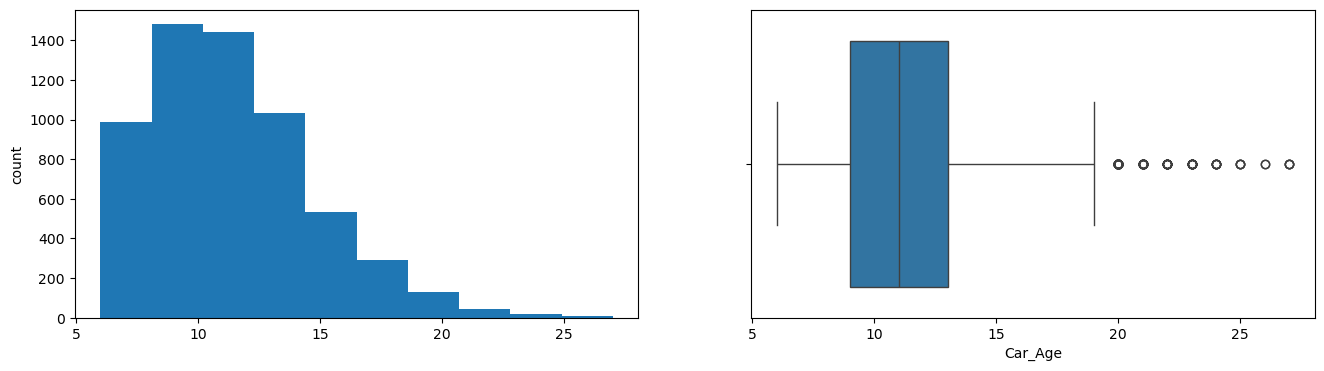

In [28]:
# Loop through each numerical column in the list 'num_col'
for col in num_col:
    print(col)
# Calculate the skewness of the column and print it, rounded to 2 decimal places
    print("Skewness:",round(data[col].skew(),2))
# Create a figure with a specified size.
    plt.figure(figsize = (16,4))
# Create a subplot for the histogram
    plt.subplot(1,2,1)
# Plot a histogram of the column without grid lines
    data[col].hist(grid = False)
    plt.ylabel("count")     # Label the y-axis
    plt.subplot(1,2,2) # Create a subplot for the box plot
    sns.boxplot(x = data[col]) # Plot a box plot of the column
    plt.show()     # Display the plots
    

### Create count plot for all categorical columns in n x 2 subplots where each subplot represents one column. 

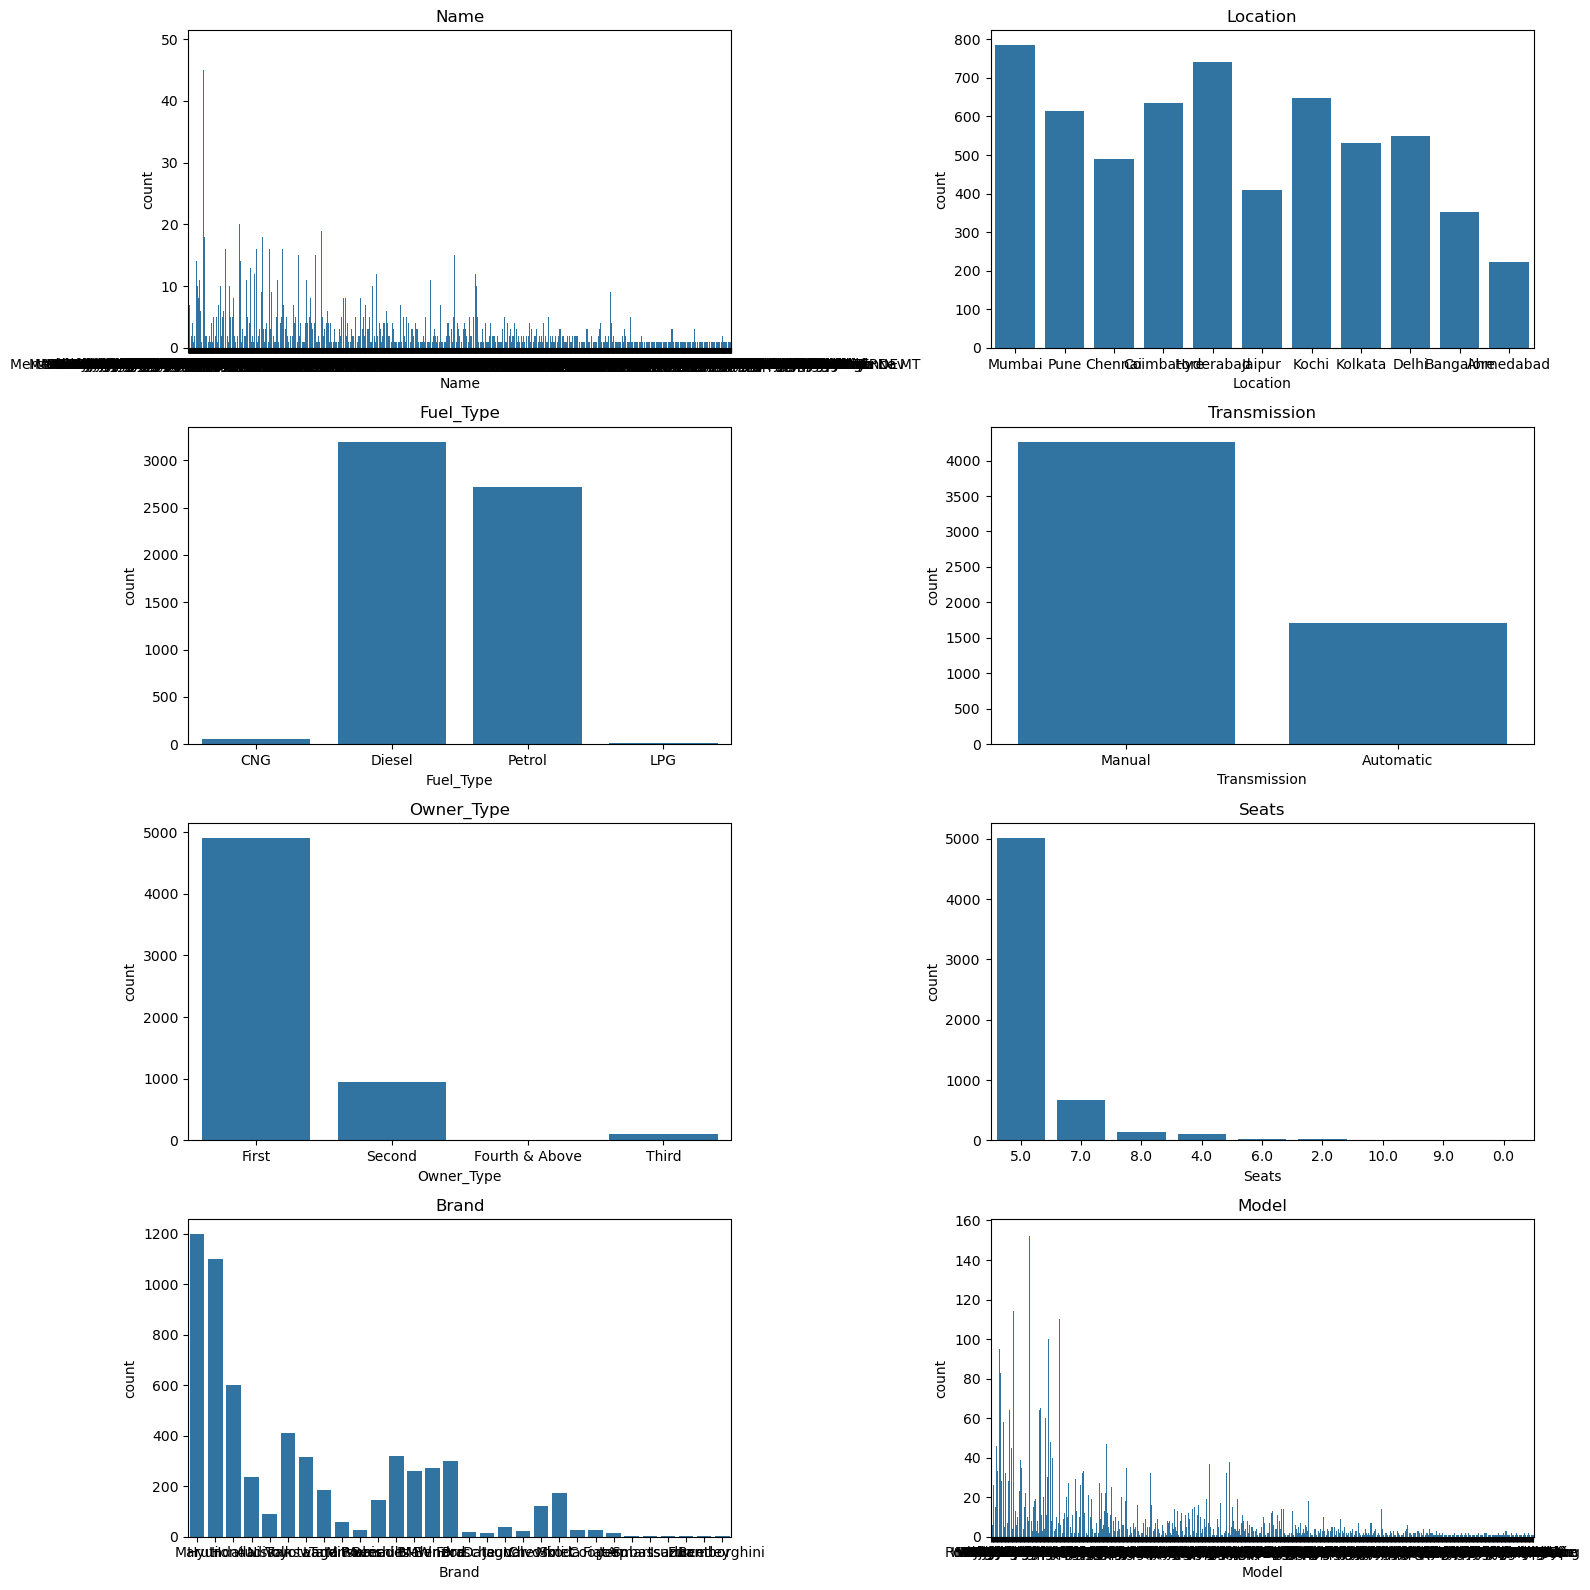

In [29]:
# Calculate the number of rows needed for the subplots (n) by determining the ceiling value
n = len(cat_col) // 2 + (1 if len(cat_col) % 2 != 0 else 0)

# Create a figure with a specified size
fig, axes = plt.subplots(n, 2, figsize=(16, 4 * n))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each categorical column and its corresponding subplot axis
for i, col in enumerate(cat_col):
    # Create a count plot for the categorical column
    sns.countplot(x=data[col], ax=axes[i])
    # Set the title of the subplot to the column name
    axes[i].set_title(col)

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()
# Display the plot
plt.show()

# From the countplot of categorical columns,we can derive the following observations.
- At ~13% Mumbai has the highest number of cars availabe for purchases, followed by Hyderabad(12%) then Kochi(10%).
- Most of the cars available for the purchases are Diesel as diesel cars provide better performance.
- 71% of tge availabe cars have Manual Transmission
- 82% of the cars are first owned followed by second hand owned cars(~15%)
- Majorly cars availabe for purchase are 5-seater(~ 84%) followed by 7-seater(~11%)
- Maruti ranks first among all brands available in used car market

In [30]:
data[data['Fuel_Type'] == 'Diesel'].shape[0]/len(data)*100

53.47280334728034

In [31]:
data[data['Transmission'] == 'Manual'].shape[0]/len(data)*100

71.39748953974896

In [32]:
data[data['Owner_Type'] == 'First'].shape[0]/len(data)*100

82.05857740585773

In [33]:
data[data['Seats'] == '5.0'].shape[0]/len(data)*100

83.88284518828452

In [34]:
data[data['Location'] == 'Mumbai'].shape[0]/len(data)*100 # shap[0] gives the count of rows.

13.121338912133892

In [35]:
# There are 3 Quartiles Q1,Q2,Q3
# Inter-Quartile Range means Q3-Q1


In [36]:
# Outlier Removal
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 -Q1 # Inter Quartile Range 
    lower_bound = Q1 - 1.5*IQR 
    upper_bound = Q3 + 1.5*IQR
# Filter the dataset to remove rows with values outside the lower and upper bounds for the current column
    data = data[(data[col]>= lower_bound) & (data[col]<=upper_bound)]

In [37]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Car_Age
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.5,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.5,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.0,Maruti,ErtigaVDI,13
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.5,Nissan,MicraDiesel,12
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.5,Toyota,InnovaCrysta,9


<Figure size 1600x2000 with 0 Axes>

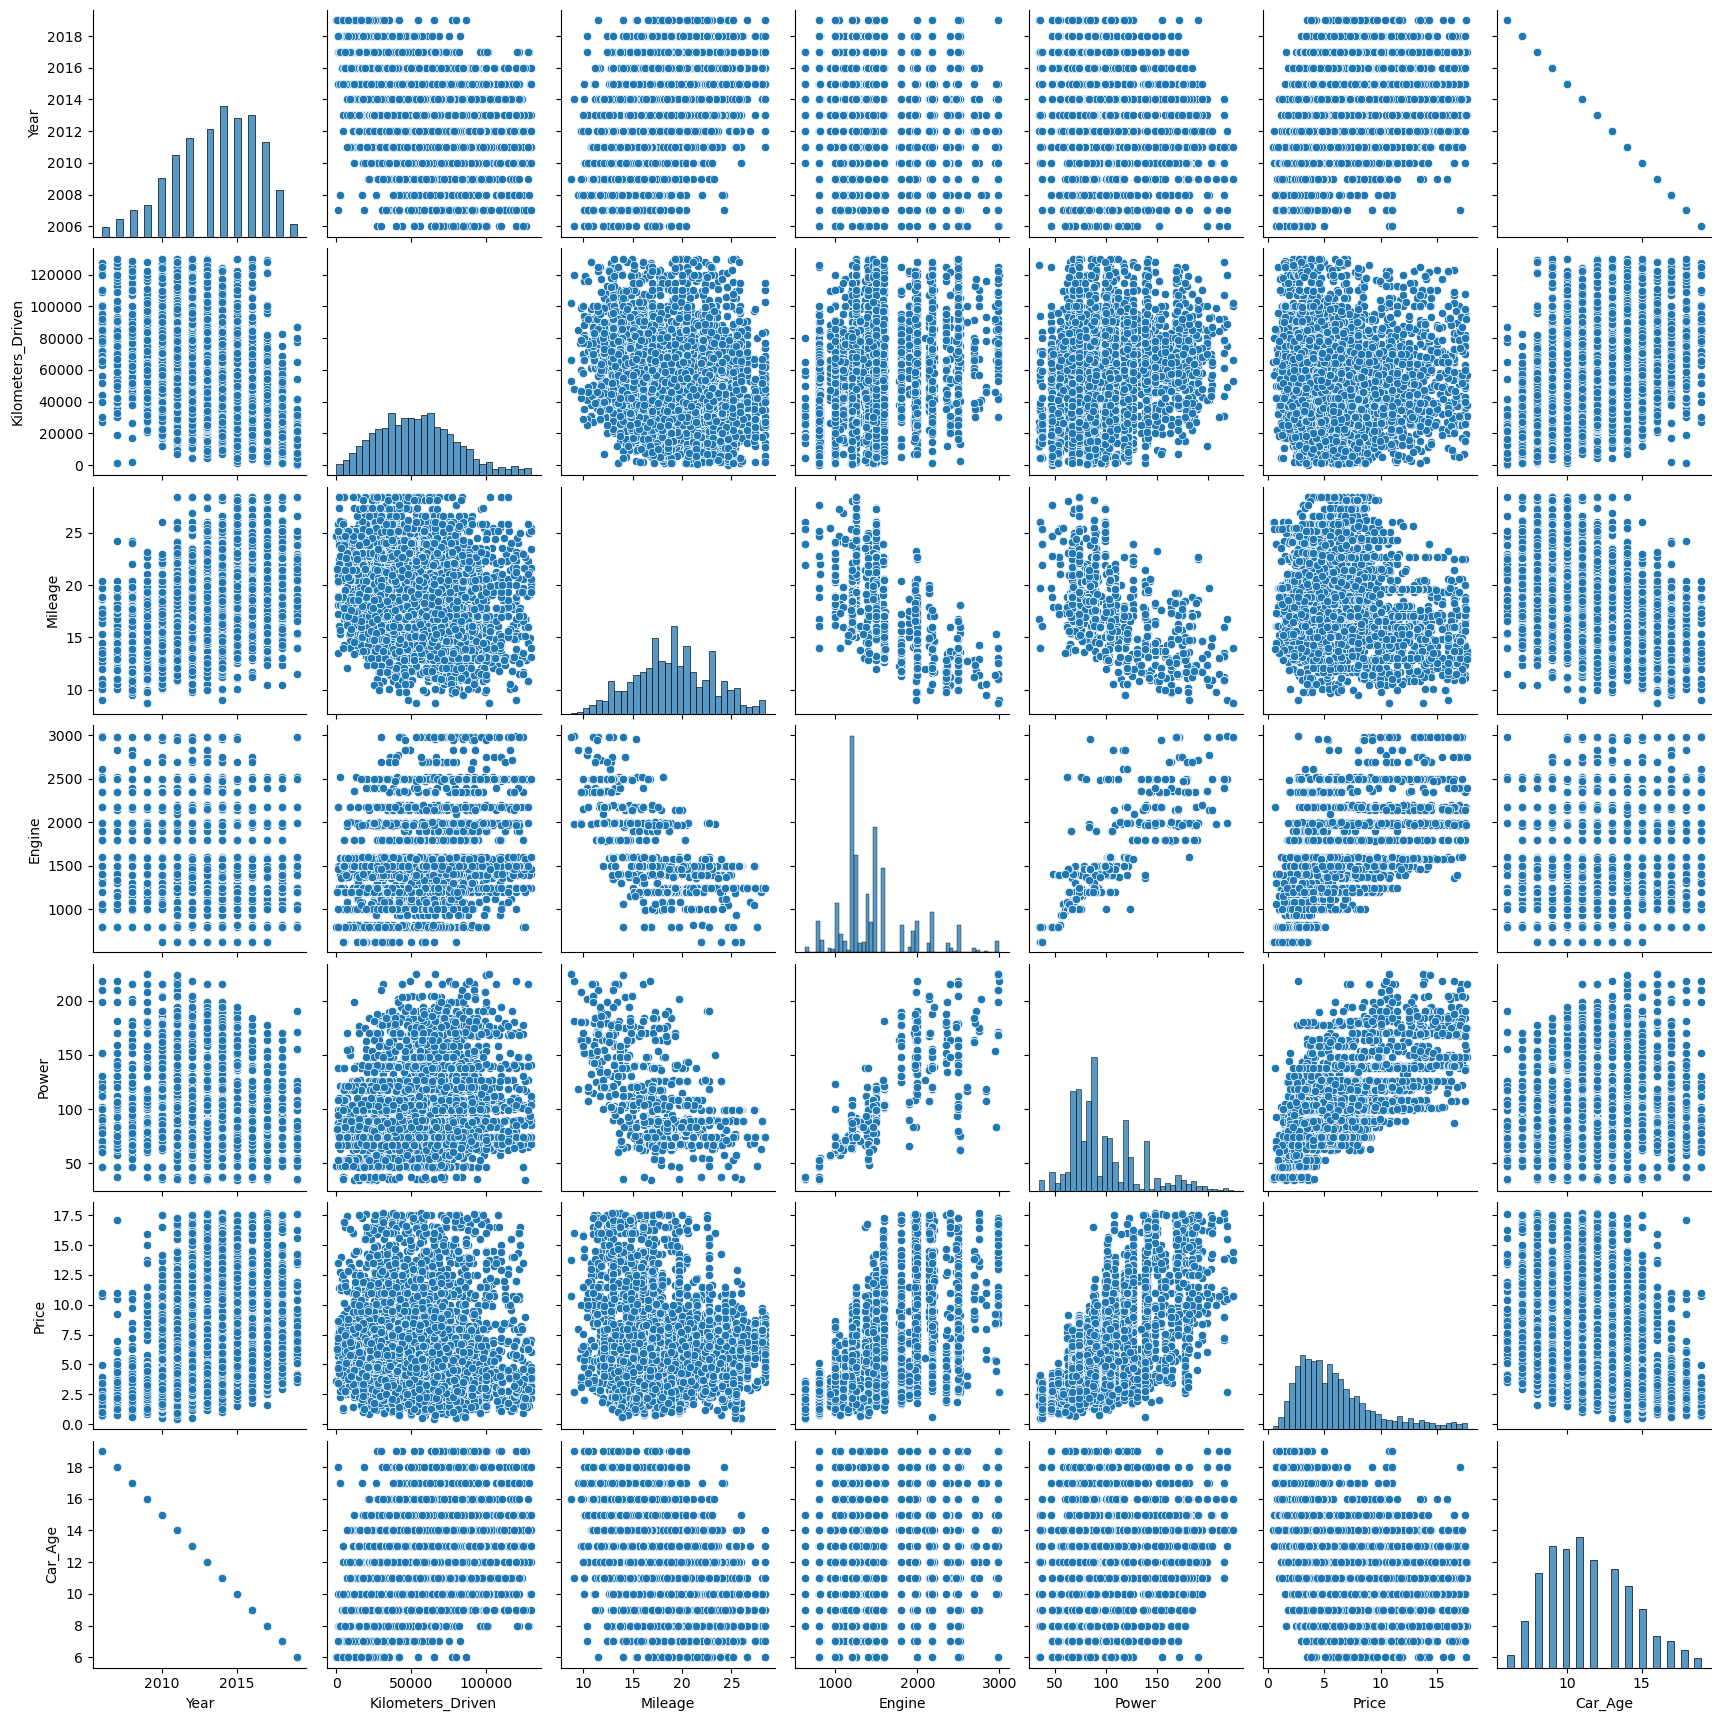

In [38]:
plt.figure(figsize=(16,20))
sns.pairplot(data)
plt.show()

# homework :
- write the analysis for the correlation matrix 
- create violin charts for price column with all the categorical columns. (refe: https://www.atlassian.com/data/charts/violin-plot-complete-guide#:~:text=A%20violin%20plot%20depicts%20distributions,plot%2C%20to%20provide%20additional%20information.)
- Create a new column luxury_brand, which takes value true if the brand is luxury brand else it takes false.

### Multivariate Analysis

In [39]:
data_num = data.select_dtypes(include = ['number'])
corr_matrix = data_num.corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Car_Age
Year,1.000000,-0.500627,0.363978,-0.190707,-0.141661,0.371018,-1.000000
Kilometers_Driven,-0.500627,1.000000,-0.163661,0.328940,0.193798,-0.072376,0.500627
Mileage,0.363978,-0.163661,1.000000,-0.605298,-0.537926,-0.247471,-0.363978
Engine,-0.190707,0.328940,-0.605298,1.000000,0.811817,0.602610,0.190707
Power,-0.141661,0.193798,-0.537926,0.811817,1.000000,0.676701,0.141661
Price,0.371018,-0.072376,-0.247471,0.602610,0.676701,1.000000,-0.371018
Car_Age,-1.000000,0.500627,-0.363978,0.190707,0.141661,-0.371018,1.000000


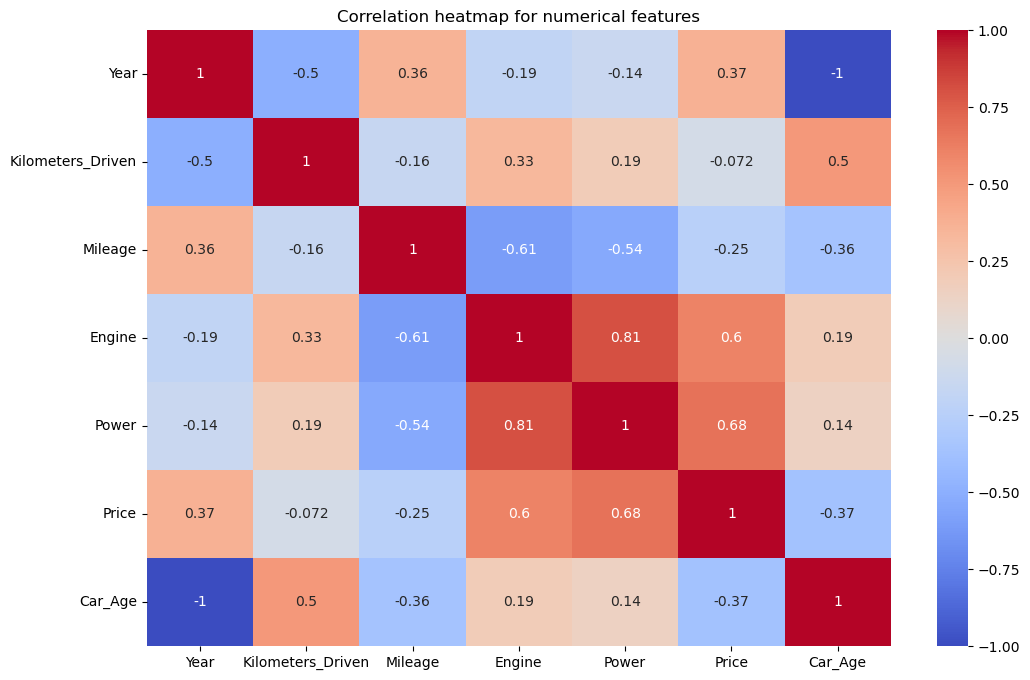

In [40]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix,annot =True,fmt ='.2g',cmap = 'coolwarm') # fmt is used to decimal values upto 2 or 3 or n of annotations 
plt.title("Correlation heatmap for numerical features")
plt.show()

### Analysis of correlation matrix.

### Positive Correlations:
- **Year and Price (0.59):** There is a moderate positive correlation between the car's year and its price, suggesting that newer cars tend to be more expensive.

- **Engine and Power (0.87):** A strong correlation exists, indicating that larger engines typically produce more power.

- **Engine and Price (0.44):** The moderate positive correlation shows that cars with larger engines generally cost more.

- **Power and Price (0.54):** More powerful cars tend to have higher prices, evidenced by this moderate correlation.

  
### Negative Correlations:
- **Year and Car Age (-1):** There's a perfect negative correlation between the car's year and its age, which is expected since age is derived from the year.

- **Kilometers Driven and Year (-0.504117):** This moderate negative correlation suggests that newer cars tend to have fewer kilometers on them and we can do further analysis to know the causation.

- **Engine and Mileage (-0.432115):** A negative correlation exists, indicating that larger engines consume more fuel.

- **Power and Mileage (-0.438006):** Similar to the engine-milage relationship, more powerful cars tend to cover fewer miles.

- **Year and Mileage (0.374337):** Newer cars may have better mileage, as suggested by this moderate positive correlation.

- **Car Age and Price (-0.589032):** This moderate negative correlation implies that older cars generally have lower market prices.

### Weak Correlations: means there is no linear relatiponship .We cant use them in linear regression 
- **Mileage and Price (0.023001):** Almost no correlation is observed between the car mileage and its price.
- **Kilometers Driven and Power (0.149949):** A weak positive correlation exists, indicating a tendency for powerful cars to have had a higher number.
- **Kilometers Driven and Engine (0.285816):** There is a weak positive correlation suggesting that large engine cars might have had more use. 




### Additional features you can create-
- Fuel_efficiency 
- Price per kilometer
- Price per Power

### Create a new column luxury_brand, which takes value true if the brand is luxury brand else it takes false.

In [41]:
data['Brand'].unique()

# Define luxury brands
luxury_brands = {'Audi', 'Mercedes-Benz', 'BMW', 'Volvo', 'Land Rover', 'Mini Cooper', 'Jeep'}

# Create luxury_brand column
data['luxury_brand'] = data['Brand'].isin(luxury_brands)

# print the data where Luxury brands are True 
print(data[data['luxury_brand'] == True][['Brand', 'luxury_brand']])

              Brand  luxury_brand
33             Audi          True
63    Mercedes-Benz          True
65             Audi          True
86              BMW          True
118             BMW          True
...             ...           ...
5921  Mercedes-Benz          True
5940  Mercedes-Benz          True
5945           Audi          True
5957           Audi          True
5962  Mercedes-Benz          True

[254 rows x 2 columns]


### create violin charts for price column with all the categorical columns.

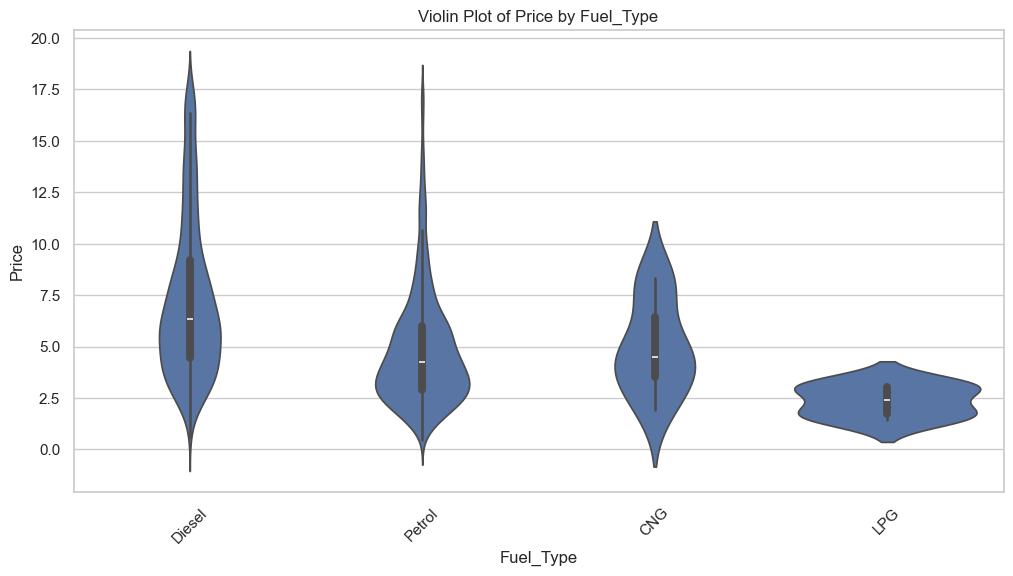

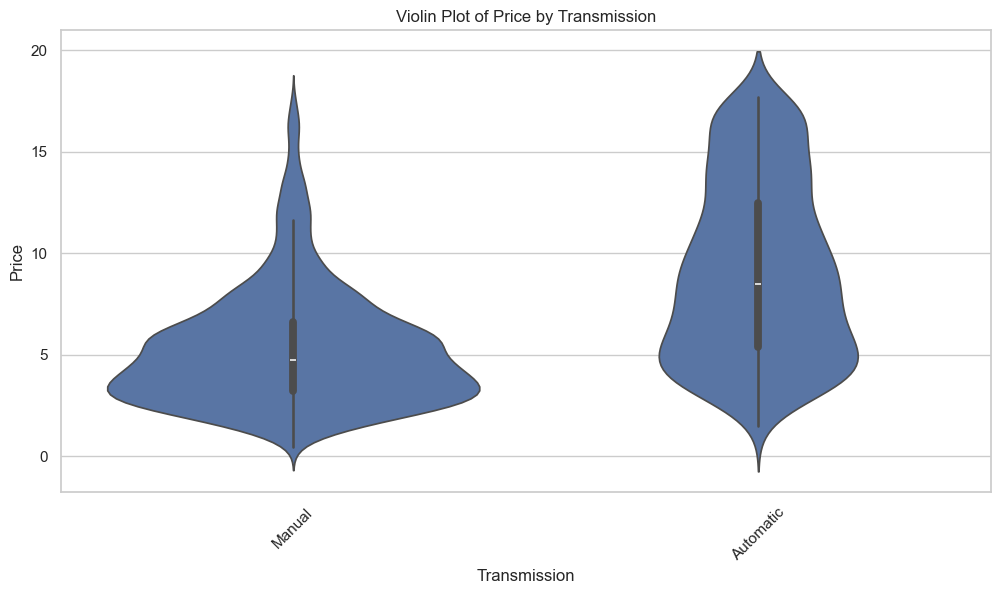

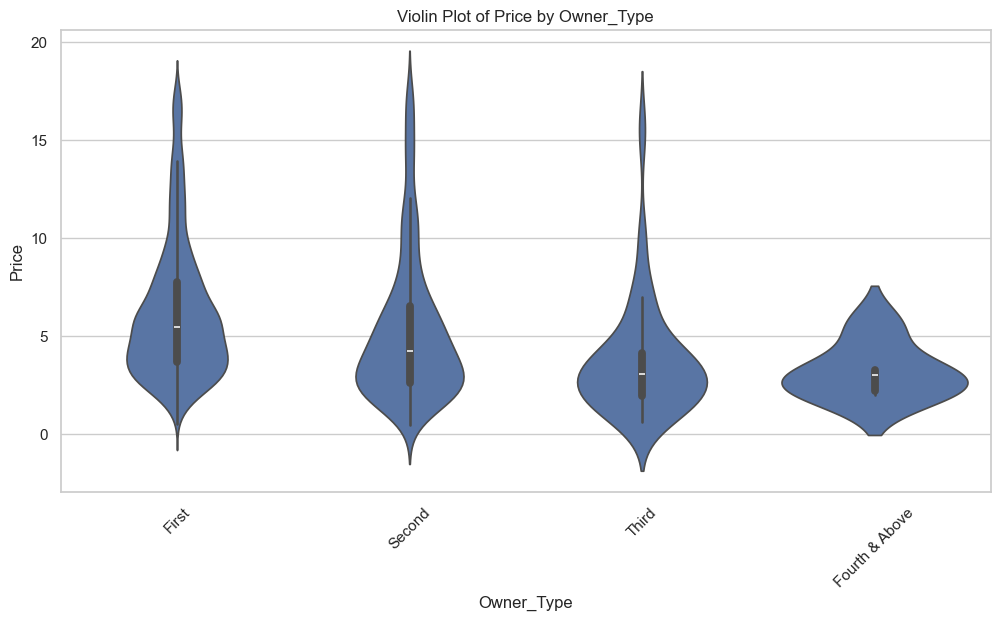

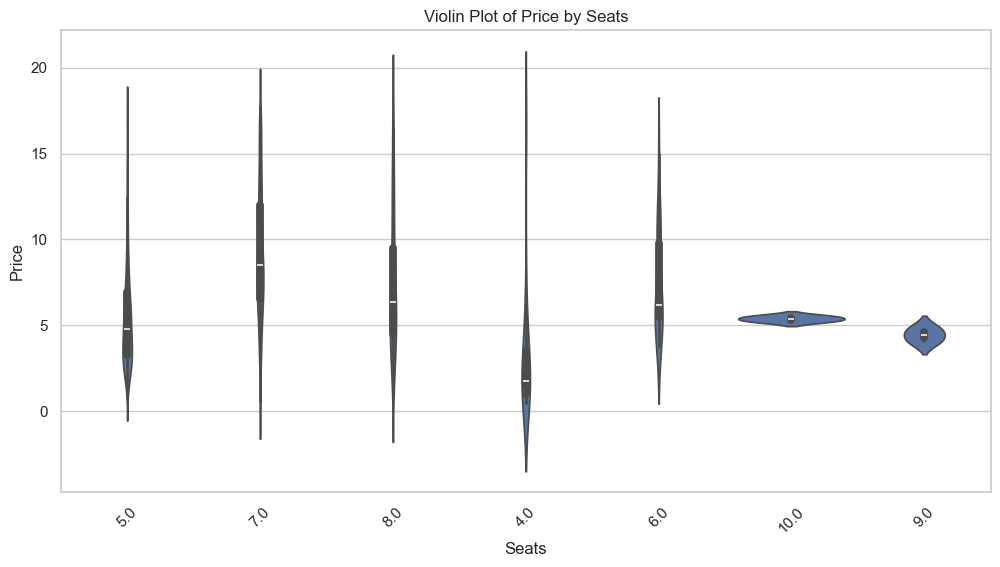

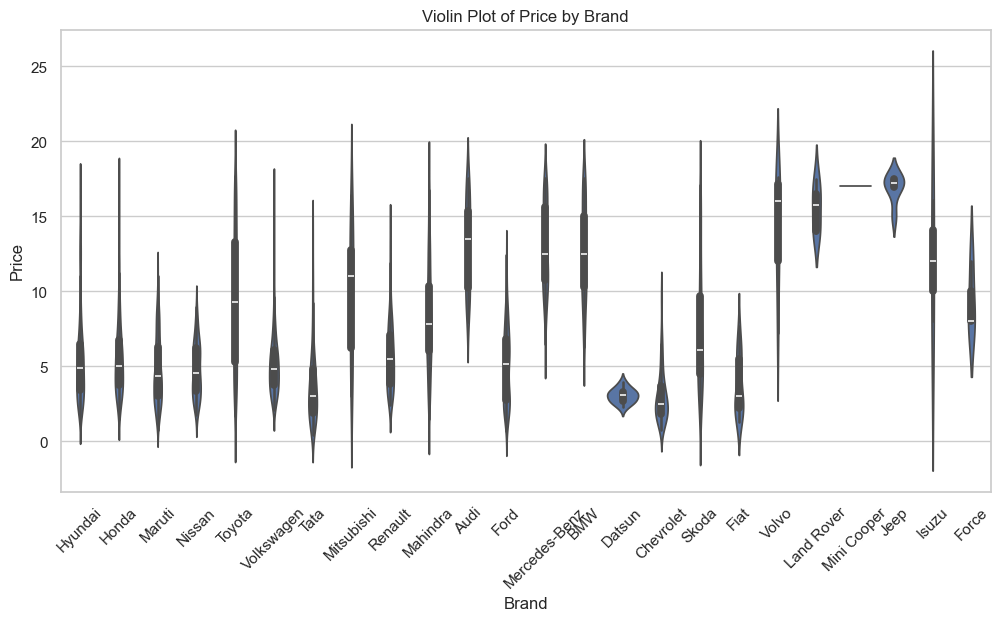

In [43]:
selected_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']
sns.set(style="whitegrid")
for col in selected_cols:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=data[col], y=data['Price'])
    plt.xticks(rotation=45)
    plt.title(f'Violin Plot of Price by {col}')
    plt.show()  # Make sure there are no non-breaking spaces here


In [ ]:
#violin chart is created between numerical and categorical columns.It shows distribution between each category